
Dataset Shape: (10000, 44)

Dataset Preview:
   Unnamed: 0  NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0        5315        2               1          5        113        7   
1        5336        2               1          6        123        9   
2        5506        1               0          5        102       11   
3        7362        2               1          8        127        7   
4        5292        3               0          4        150       16   

   NumDashInHostname  NumUnderscore  NumQueryComponents  NumAmpersand  ...  \
0                  0              0                   1             0  ...   
1                  0              0                   1             0  ...   
2                  0              0                   0             0  ...   
3                  1              0                   0             0  ...   
4                  0              0                   1             0  ...   

   IframeOrFrame  MissingTitle  ImagesOnlyInFo

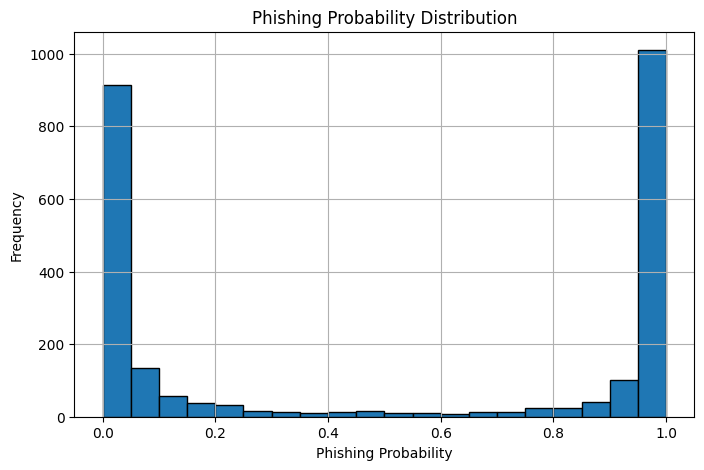

In [ ]:
#Website Phishing Detection using Machine Learning
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

# LOAD DATASET 
df = pd.read_csv("Phishing_Legitimate_Websites.csv")

print("\nDataset Shape:", df.shape)
print("\nDataset Preview:")
print(df.head())

# All features are used  except label and index
X = df.drop(columns=['CLASS_LABEL', 'Unnamed: 0'])
y = df['CLASS_LABEL']

print("\nNumber of Features Used:", X.shape[1])

# TRAIN-TEST SPLIT 
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("Training Samples:", X_train.shape[0])
print("Testing Samples :", X_test.shape[0])

#  MODEL TRAINING (Decision Tree & Random Forest)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

#  MODEL EVALUATION 
models = {
    "Decision Tree": dt_model,
    "Random Forest": rf_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)

    print(f"\n================ {name} Evaluation ================")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, pos_label=1))
    print("Recall   :", recall_score(y_test, y_pred, pos_label=1))
    print("F1-score :", f1_score(y_test, y_pred, pos_label=1))

    print("\nClassification Report:")
    print(classification_report(
        y_test,
        y_pred,
        target_names=["Legitimate", "Phishing"]
    ))

    print("Prediction Distribution:")
    print(pd.Series(y_pred).value_counts())

#  CROSS-VALIDATION 
cv_scores = cross_val_score(
    RandomForestClassifier(n_estimators=200, random_state=42),
    X, y,
    cv=5,
    scoring='f1'
)

print("\nCross-Validation F1 Scores:", cv_scores)
print("Mean Cross-Validation F1-score:", cv_scores.mean())

#  INTELLIGENT AGENT Rule BASED SYSTEM
def phishing_agent(feature_vector, model, feature_names):
    
    feature_df = pd.DataFrame([feature_vector], columns=feature_names)
    phishing_prob = model.predict_proba(feature_df)[0][1]
    phishing_prob = round(phishing_prob, 3)

    if phishing_prob > 0.80:
        action = "🚫 BLOCK ACCESS"
        risk = "HIGH"
    elif phishing_prob >= 0.50:
        action = "⚠ WARNING"
        risk = "MEDIUM"
    else:
        action = "✔ ALLOW ACCESS"
        risk = "LOW"

    return phishing_prob, risk, action

#  SAMPLE AGENT DECISION 
sample_features = X_test.iloc[0]
probability, risk_level, agent_action = phishing_agent(
    sample_features,
    rf_model,
    X.columns
)

print("\n================ SAMPLE AGENT DECISION ================")
print("Phishing Probability:", probability)
print("Risk Level          :", risk_level)
print("Agent Action        :", agent_action)

#  VISUALIZATION 
probs = rf_model.predict_proba(X_test)[:, 1]

plt.figure(figsize=(8, 5))
plt.hist(probs, bins=20, edgecolor='black')
plt.title("Phishing Probability Distribution")
plt.xlabel("Phishing Probability")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [17]:
# ================= MANUAL WEBSITE TESTING ==================
def manual_website_test(model, feature_names):
    """
    Allows manual input of feature values to test unseen websites
    """
    print("\n================ MANUAL WEBSITE TEST ================")
    print("Enter numerical values for each feature:")

    input_values = []

    for feature in feature_names:
        while True:
            try:
                value = float(input(f"{feature}: "))
                input_values.append(value)
                break
            except ValueError:
                print("Please enter a valid number.")

    feature_df = pd.DataFrame([input_values], columns=feature_names)

    phishing_prob = model.predict_proba(feature_df)[0][1]
    phishing_prob = round(phishing_prob, 3)

    if phishing_prob > 0.80:
        action = "🚫 BLOCK ACCESS"
        risk = "HIGH"
    elif phishing_prob >= 0.50:
        action = "⚠ WARNING"
        risk = "MEDIUM"
    else:
        action = "✔ ALLOW ACCESS"
        risk = "LOW"

    print("\n================ AGENT DECISION ================")
    print("Phishing Probability:", phishing_prob)
    print("Risk Level          :", risk)
    print("Agent Action        :", action)


# Call the manual testing function
manual_website_test(rf_model, X.columns)



================ MANUAL WEBSITE TEST ================
Enter numerical values for each feature:
Please enter a valid number.

================ AGENT DECISION ================
Phishing Probability: 0.67
Risk Level          : MEDIUM
Agent Action        : ⚠ WARNING
